<a href="https://colab.research.google.com/github/anushka1507/Clipping_algorithm-python-/blob/main/clipping_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face coordinates: (274, 367, 445, 538)


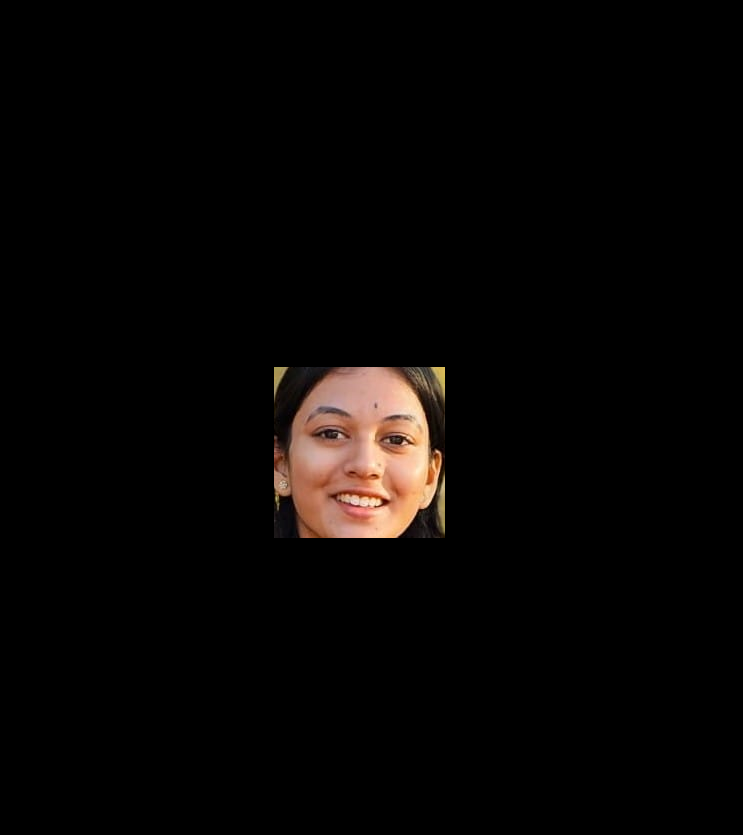

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def preprocess_image(image):
    if image is None:
        raise ValueError("Failed to load image. Check if the image path is correct.")
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to obtain binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_face(image):
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale for detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # If no faces are detected, return None
    if len(faces) == 0:
        return None

    # Extract coordinates of the first face detected (assuming only one face in the image)
    x, y, w, h = faces[0]
    return (x, y, x+w, y+h)  # Return coordinates as (x1, y1, x2, y2) format

def apply_line_clipping(image, face_coordinates):
    # Initialize clipped image with zeros
    clipped_image = np.zeros_like(image)

    # Extract face region coordinates
    x1, y1, x2, y2 = face_coordinates

    # Copy color information from original image within the face region
    for y in range(y1, y2):
        for x in range(x1, x2):
            clipped_image[y, x] = image[y, x]

    return clipped_image

# Read input image
input_image_path = '/input.jpg.jpeg'
input_image = cv2.imread(input_image_path)

# Check if image was loaded successfully
if input_image is None:
    raise ValueError("Failed to load image. Check if the image path is correct.")

# Perform face detection to get face region coordinates
face_coordinates = detect_face(input_image)

if face_coordinates is None:
    print("No face detected in the image.")
else:
    print("Face coordinates:", face_coordinates)

# Convert image to binary format (background = white, face = black)
binary_image = preprocess_image(input_image)

# Apply line clipping algorithm to eliminate background
clipped_image = apply_line_clipping(input_image, face_coordinates)

# Display the resulting image with the detected face region outlined
cv2_imshow(clipped_image)


Face coordinates: (274, 367, 445, 538)


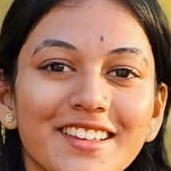

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def preprocess_image(image):
    if image is None:
        raise ValueError("Failed to load image. Check if the image path is correct.")
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply thresholding to obtain binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

def detect_face(image):
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale for detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # If no faces are detected, return None
    if len(faces) == 0:
        return None

    # Extract coordinates of the first face detected (assuming only one face in the image)
    x, y, w, h = faces[0]
    return (x, y, x+w, y+h)  # Return coordinates as (x1, y1, x2, y2) format

def apply_line_clipping(image, face_coordinates):
    # Extract face region coordinates
    x1, y1, x2, y2 = face_coordinates

    # Copy color information from original image within the face region
    clipped_image = image[y1:y2, x1:x2]

    return clipped_image

# Read input image
input_image_path = '/input.jpg.jpeg'
input_image = cv2.imread(input_image_path)

# Check if image was loaded successfully
if input_image is None:
    raise ValueError("Failed to load image. Check if the image path is correct.")

# Perform face detection to get face region coordinates
face_coordinates = detect_face(input_image)

if face_coordinates is None:
    print("No face detected in the image.")
else:
    print("Face coordinates:", face_coordinates)

# Convert image to binary format (background = white, face = black)
binary_image = preprocess_image(input_image)

# Apply line clipping algorithm to eliminate background
clipped_image = apply_line_clipping(input_image, face_coordinates)

# Display the resulting image with the detected face region outlined
cv2_imshow(clipped_image)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

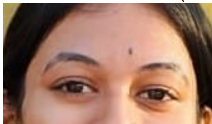

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def apply_polygon_clipping(image, forehead_polygon, eyes_polygon):
    # Convert polygons to grayscale
    forehead_mask = cv2.cvtColor(forehead_polygon, cv2.COLOR_BGR2GRAY)
    eyes_mask = cv2.cvtColor(eyes_polygon, cv2.COLOR_BGR2GRAY)

    # Apply polygon clipping to select forehead and eyes regions
    forehead_region = cv2.bitwise_and(image, image, mask=forehead_mask)
    eyes_region = cv2.bitwise_and(image, image, mask=eyes_mask)
    return cv2.bitwise_or(forehead_region, eyes_region)

# Read input clipped image
clipped_image_path = '/content/clipped_image.jpg.png'
clipped_image = cv2.imread(clipped_image_path)

# Check if image was loaded successfully
if clipped_image is None:
    raise ValueError("Failed to load image. Check if the image path is correct.")

# Define polygons for forehead and eyes (simplified for demonstration)
forehead_polygon = np.zeros_like(clipped_image)
forehead_height = clipped_image.shape[0] // 3  # Adjust the height of the forehead region
forehead_polygon[:forehead_height, :] = 255  # Assuming forehead occupies the upper 1/3rd of the image

eyes_polygon = np.zeros_like(clipped_image)
eyes_height = clipped_image.shape[0] // 3 - 20  # Adjust the height of the eyes region, reducing by 20 pixels
eyes_polygon[forehead_height:(forehead_height + eyes_height), :] = 255  # Assuming eyes occupy the next 1/3rd of the image

# Apply polygon clipping to select forehead and eyes regions together
forehead_and_eyes_region = apply_polygon_clipping(clipped_image, forehead_polygon, eyes_polygon)

# Find the bounding box of the non-zero region
coords = cv2.findNonZero(cv2.cvtColor(forehead_and_eyes_region, cv2.COLOR_BGR2GRAY))
x, y, w, h = cv2.boundingRect(coords)

# Crop the image to remove the excess black area from the bottom
cropped_image = forehead_and_eyes_region[y:y+h, x:x+w]

# Display the resulting image containing only forehead and eyes together
cv2_imshow(cropped_image)


Eye coordinates: (59, 78, 116, 135)


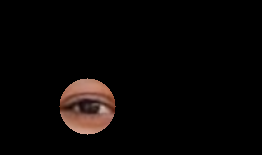

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_eye(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained eye detector
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Detect eyes in the image
    eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # If no eyes are detected, return None
    if len(eyes) == 0:
        return None

    # Extract coordinates of the first eye detected (assuming only one eye in the image)
    x, y, w, h = eyes[0]
    return (x, y, x+w, y+h)  # Return coordinates as (x1, y1, x2, y2) format

def apply_circle_mask(image, center, radius):
    # Create a mask of zeros with the same dimensions as the input image
    mask = np.zeros_like(image)

    # Draw a filled circle on the mask
    cv2.circle(mask, center, radius, (255, 255, 255), -1)

    # Apply the mask to the input image
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image

# Read cropped image
cropped_image_path = '/content/cropped_image.png'
cropped_image = cv2.imread(cropped_image_path)

# Check if image was loaded successfully
if cropped_image is None:
    raise ValueError("Failed to load image. Check if the image path is correct.")

# Detect eye in the cropped image
eye_coordinates = detect_eye(cropped_image)

if eye_coordinates is None:
    print("No eye detected in the image.")
else:
    print("Eye coordinates:", eye_coordinates)

# Calculate the center and radius of the pupil (simplified for demonstration)
pupil_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)
pupil_radius = min((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

# Apply circle mask to highlight the pupil
masked_image = apply_circle_mask(cropped_image, pupil_center, pupil_radius)

# Display the resulting image with the highlighted pupil
cv2_imshow(masked_image)


Eye coordinates: (59, 78, 116, 135)


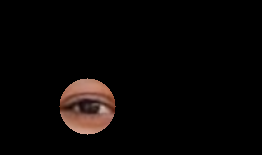

The selected pixel is outside the boundary of the eyeball.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def detect_eye(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Load the pre-trained eye detector
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    # Detect eyes in the image
    eyes = eye_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

    # If no eyes are detected, return None
    if len(eyes) == 0:
        return None

    # Extract coordinates of the first eye detected (assuming only one eye in the image)
    x, y, w, h = eyes[0]
    return (x, y, x+w, y+h)  # Return coordinates as (x1, y1, x2, y2) format

def apply_circle_mask(image, center, radius):
    # Create a mask of zeros with the same dimensions as the input image
    mask = np.zeros_like(image)

    # Draw a filled circle on the mask
    cv2.circle(mask, center, radius, (255, 255, 255), -1)

    # Apply the mask to the input image
    masked_image = cv2.bitwise_and(image, mask)

    return masked_image

def point_in_circle(point, center, radius):
    """
    Check if a point lies within a circle.

    Args:
        point (tuple): Coordinates of the point (x, y).
        center (tuple): Coordinates of the center of the circle (x, y).
        radius (int): Radius of the circle.

    Returns:
        bool: True if the point is within the circle, False otherwise.
    """
    x, y = point
    cx, cy = center
    distance_squared = (x - cx) ** 2 + (y - cy) ** 2
    return distance_squared <= radius ** 2

# Read cropped image
cropped_image_path = '/content/cropped_image.png'
cropped_image = cv2.imread(cropped_image_path)

# Check if image was loaded successfully
if cropped_image is None:
    raise ValueError("Failed to load image. Check if the image path is correct.")

# Detect eye in the cropped image
eye_coordinates = detect_eye(cropped_image)

if eye_coordinates is None:
    print("No eye detected in the image.")
else:
    print("Eye coordinates:", eye_coordinates)

# Calculate the center and radius of the pupil (simplified for demonstration)
pupil_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)
pupil_radius = min((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

# Apply circle mask to highlight the pupil
masked_image = apply_circle_mask(cropped_image, pupil_center, pupil_radius)

# Display the resulting image with the highlighted pupil
cv2_imshow(masked_image)

# Define center and radius of the eyeball (simplified for demonstration)
eyeball_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)
eyeball_radius = max((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

# Check if the selected pixel lies within the boundary of the eyeball
selected_pixel = (pupil_center[0], pupil_center[1] + pupil_radius + 5)  # Example selected pixel
is_inside_eyeball = point_in_circle(selected_pixel, eyeball_center, eyeball_radius)

if is_inside_eyeball:
    print("The selected pixel is inside the boundary of the eyeball.")
else:
    print("The selected pixel is outside the boundary of the eyeball.")


In [ ]:
# Given eye coordinates
eye_coordinates = (59, 78, 116, 135)

# Calculate center of the pupil
pupil_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)

# Calculate radius of the pupil
pupil_radius = min((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

print("Pupil center:", pupil_center)
print("Pupil radius:", pupil_radius)


Pupil center: (87, 106)
Pupil radius: 28


In [ ]:
import cv2
import numpy as np

def point_clipping(x, y, center_x, center_y, radius):
    # Calculate the distance between the point and the center of the pupil
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # If the distance is less than or equal to the radius of the pupil, the point is inside the iris boundary
    if distance <= radius:
        return True
    else:
        return False

# Given eye coordinates
eye_coordinates = (59, 78, 116, 135)

# Calculate center of the pupil
pupil_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)

# Calculate radius of the pupil
pupil_radius = min((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

print("Pupil center:", pupil_center)
print("Pupil radius:", pupil_radius)

# Test points to check
test_points = [(pupil_center[0], pupil_center[1]),  # Center of the pupil
               (pupil_center[0] + pupil_radius, pupil_center[1]),  # Point on the boundary of the pupil
               (pupil_center[0] + pupil_radius + 1, pupil_center[1]),  # Point outside the boundary of the pupil
               (pupil_center[0] - pupil_radius, pupil_center[1]),  # Point on the boundary of the pupil
               (pupil_center[0] - pupil_radius - 1, pupil_center[1])]  # Point outside the boundary of the pupil

# Check if the test points are inside the iris boundary
for point in test_points:
    result = point_clipping(point[0], point[1], pupil_center[0], pupil_center[1], pupil_radius)
    print("Point:", point, "Result:", result)


Pupil center: (87, 106)
Pupil radius: 28
Point: (87, 106) Result: True
Point: (115, 106) Result: True
Point: (116, 106) Result: False
Point: (59, 106) Result: True
Point: (58, 106) Result: False


In [ ]:
import cv2
import numpy as np

def point_clipping(x, y, center_x, center_y, radius):
    # Calculate the distance between the point and the center of the pupil
    distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

    # If the distance is less than or equal to the radius of the pupil, the point is inside the iris boundary
    if distance <= radius:
        return True
    else:
        return False

# Given eye coordinates
eye_coordinates = (59, 78, 116, 135)

# Calculate center of the pupil
pupil_center = ((eye_coordinates[0] + eye_coordinates[2]) // 2, (eye_coordinates[1] + eye_coordinates[3]) // 2)

# Calculate radius of the pupil
pupil_radius = min((eye_coordinates[2] - eye_coordinates[0]) // 2, (eye_coordinates[3] - eye_coordinates[1]) // 2)

print("Pupil center:", pupil_center)
print("Pupil radius:", pupil_radius)

# Check if the center of the pupil is inside the iris boundary
result = point_clipping(pupil_center[0], pupil_center[1], pupil_center[0], pupil_center[1], pupil_radius)
print("Center of pupil is inside iris boundary:", result)


Pupil center: (87, 106)
Pupil radius: 28
Center of pupil is inside iris boundary: True
